C:\Users\18117\AppData\Local\Temp\ipykernel_25248\1639759130.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


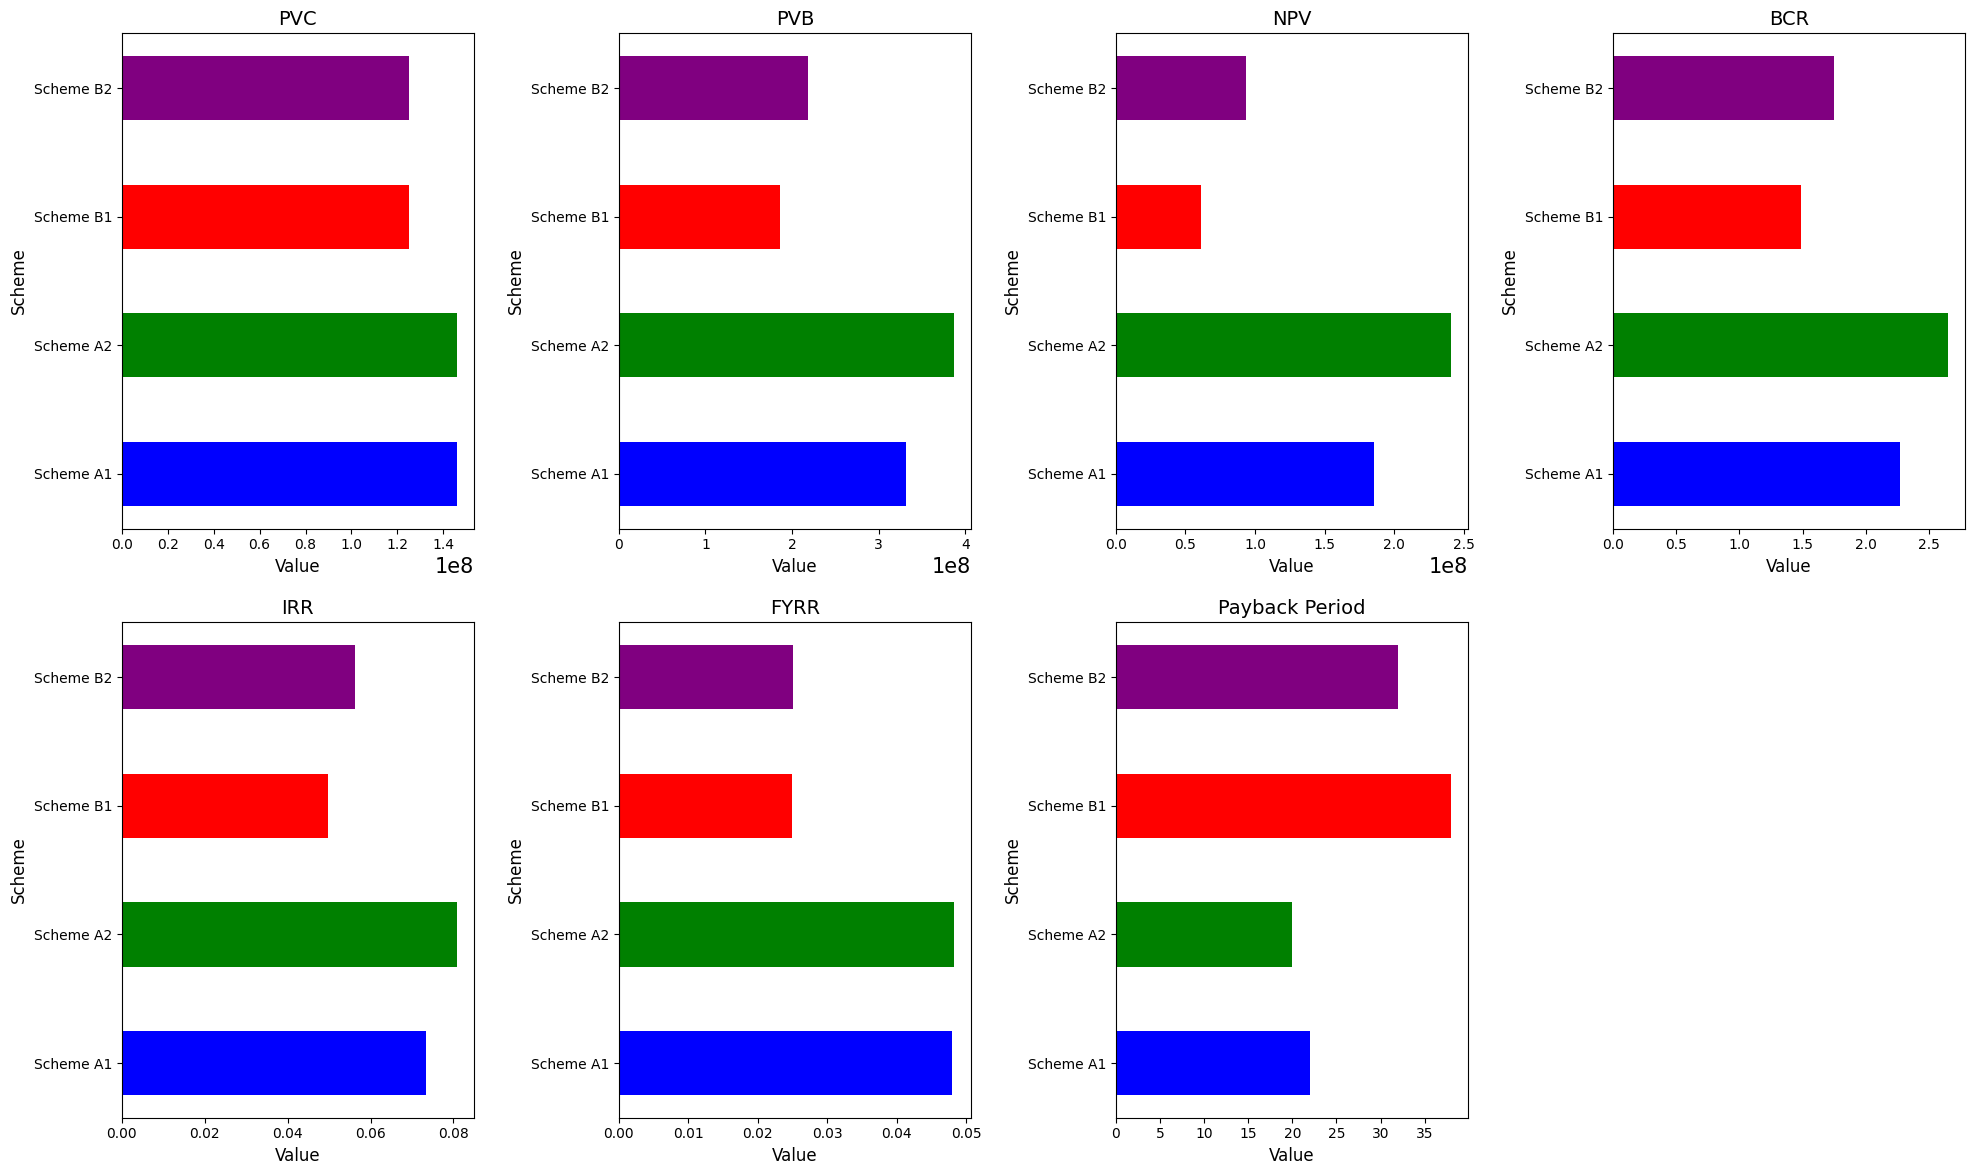

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from eco import TransportationScheme
plt.rcParams.update({'font.size': 15})
SchemeA1 = TransportationScheme('voc.csv')
SchemeA2 = TransportationScheme('voc.csv', growth_rate=0.02)
schemeB1 = TransportationScheme('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000)
schemeB2 = TransportationScheme('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000, growth_rate = 0.02)
resultA1 = SchemeA1.financial_metrics
resultA2 = SchemeA2.financial_metrics
resultB1 = schemeB1.financial_metrics
resultB2 = schemeB2.financial_metrics

result_dict = {'Scheme A1': resultA1, 'Scheme A2': resultA2, 'Scheme B1': resultB1, 'Scheme B2': resultB2}

def plot_bar_chart(result_dict):
    # 转换数据以适应图形绘制

    # 转换数据以适应图形绘制
    first_key = next(iter(result_dict))
    metrics = list(result_dict[first_key].keys())  # 指标名称
    values = {metric: [] for metric in metrics}  # 按指标组织的值

    for scheme in result_dict.values():
        for metric, value in scheme.items():
            if value == 'N/A':
                values[metric].append(0)
            else:
                values[metric].append(value)

    # 计算行列数，适应七个指标
    rows = 2
    columns = len(metrics) // rows + (len(metrics) % rows > 0)  # 确保所有图形都能被正确放置

    # 绘制柱状图
    fig, axs = plt.subplots(rows, columns, figsize=(20, 12), constrained_layout=True)

    for i, metric in enumerate(metrics):
        # 当只有一行或一列时，axs 可能不是二维数组，这需要特别处理
        if rows * columns == 1:
            ax = axs
        elif rows == 1:  # 仅一行
            ax = axs[i]
        elif columns == 1:  # 仅一列
            ax = axs[i]
        else:  # 多行多列
            ax = axs[i // columns, i % columns]

        ax.barh(list(result_dict.keys()), values[metric], color=['blue', 'green', 'red', 'purple'], height=0.5)
        ax.set_title(metric, fontsize=14)  # 调整了字体大小
        ax.set_ylabel('Scheme', fontsize=12)
        ax.set_xlabel('Value', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)

    # 隐藏多余的子图位置
    if len(metrics) % (rows * columns) != 0:  # 如果指标数不能被子图总数整除
        for idx in range(len(metrics), rows * columns):
            fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.show()


plot_bar_chart(result_dict)




如果是汽油呢？

C:\Users\18117\AppData\Local\Temp\ipykernel_25248\1639759130.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


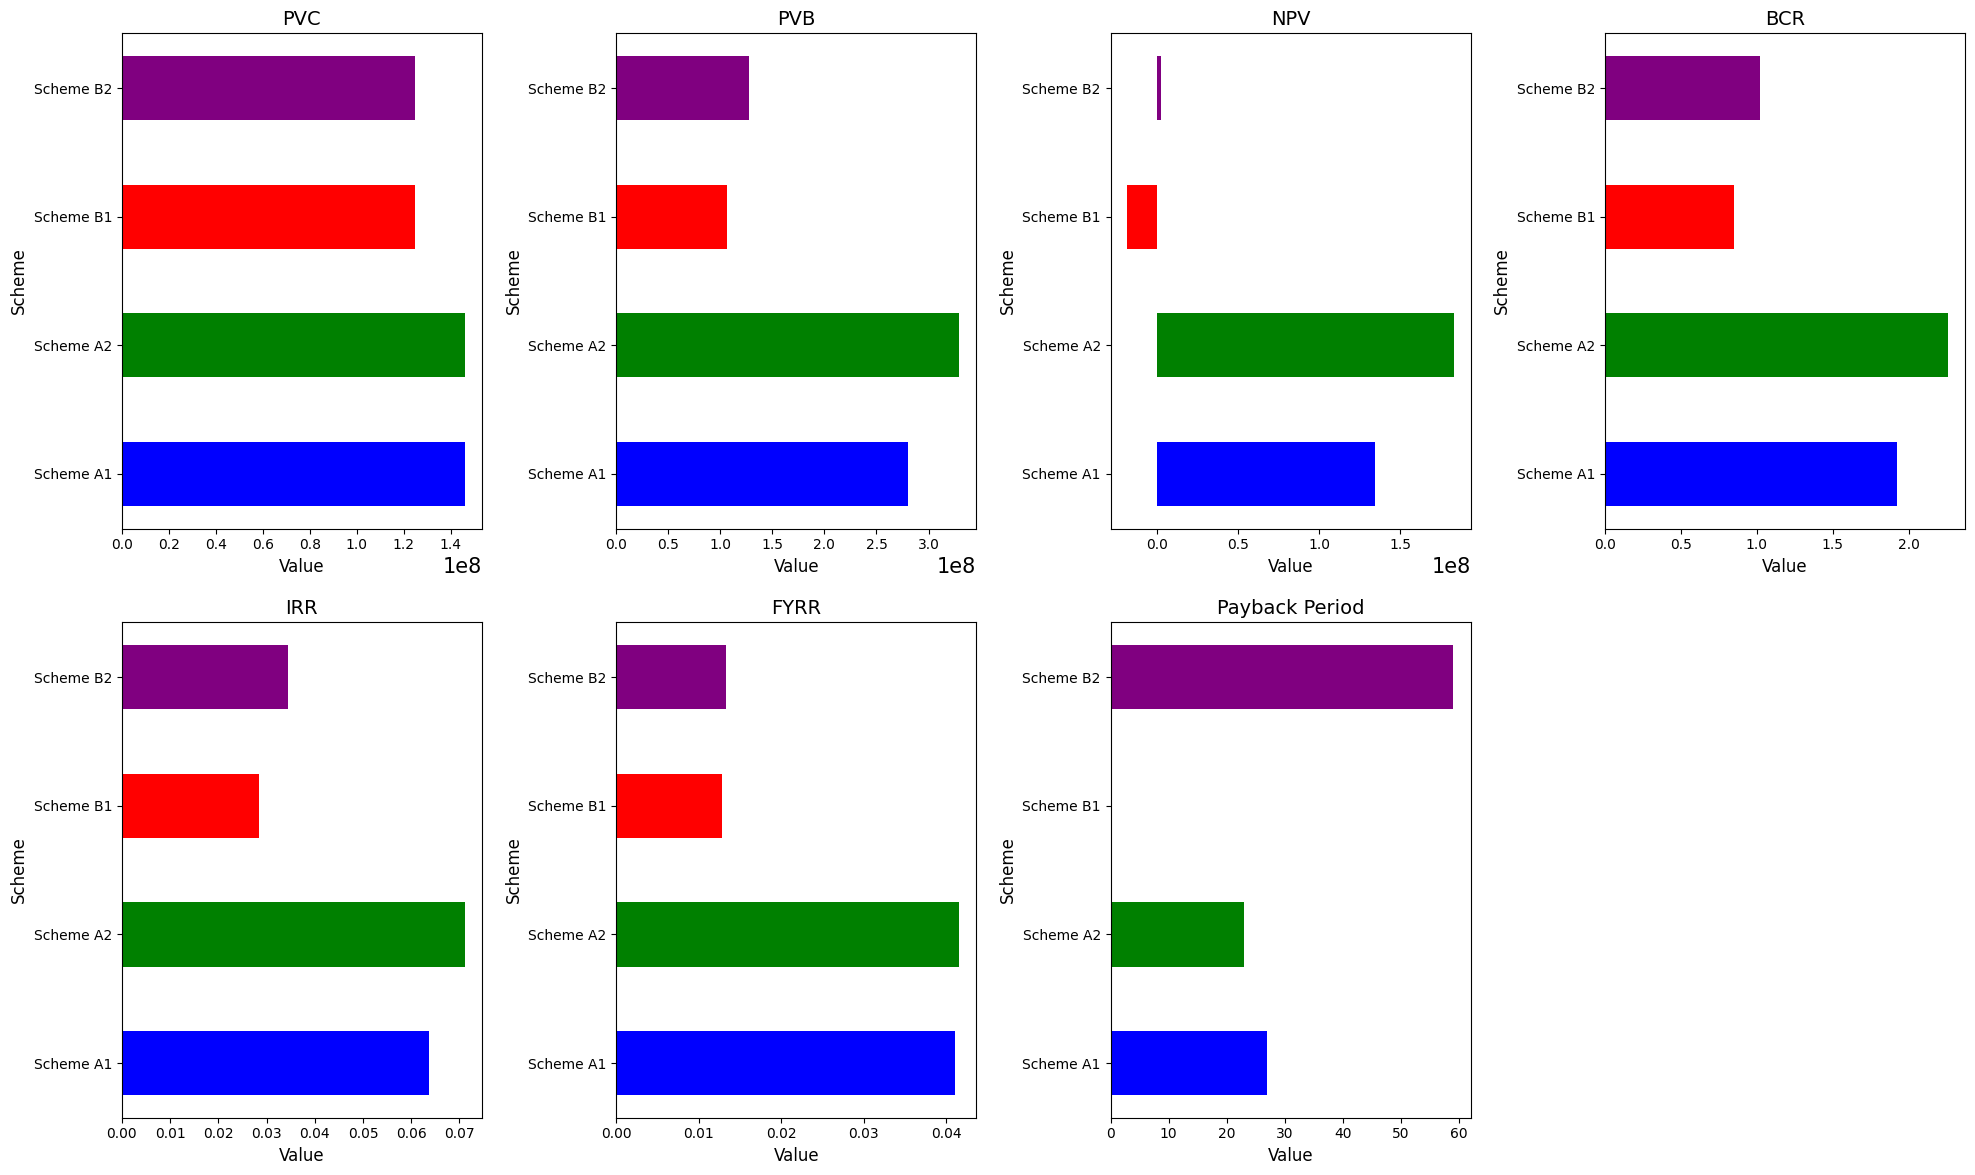

In [17]:
from eco_petrol import EcoPetrol
SchemeA1 = EcoPetrol('voc.csv')
SchemeA2 = EcoPetrol('voc.csv', growth_rate=0.02)
schemeB1 = EcoPetrol('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000)
schemeB2 = EcoPetrol('voc.csv', road_length_A = 11, \
        AADT_A=13500, AADT_A_O=3500, construction_cost_A=77000000, maintenance_cost_A=10000, growth_rate = 0.02)
resultA1 = SchemeA1.financial_metrics
resultA2 = SchemeA2.financial_metrics
resultB1 = schemeB1.financial_metrics
resultB2 = schemeB2.financial_metrics
result_dict = {'Scheme A1': resultA1, 'Scheme A2': resultA2, 'Scheme B1': resultB1, 'Scheme B2': resultB2}
plot_bar_chart(result_dict)

折线图

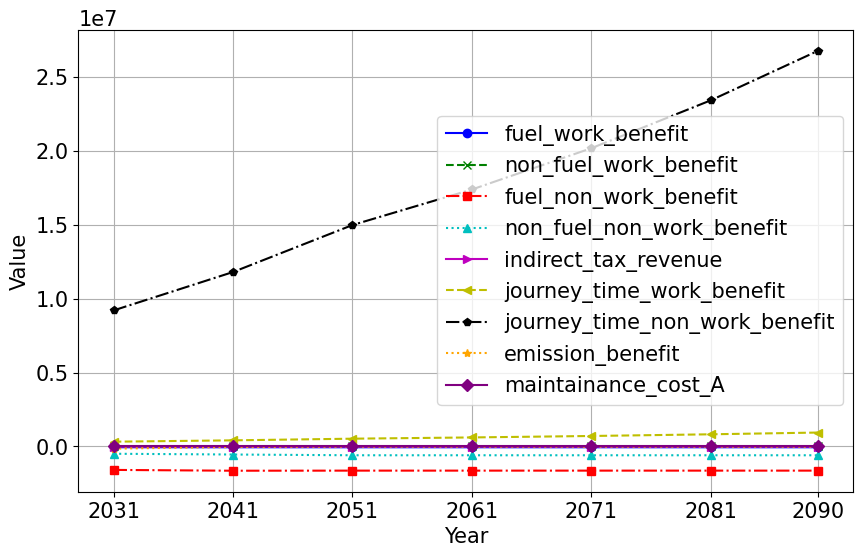

In [18]:
def draw_line_chart(schemeA1):

    costs_benefits = schemeA1.costs_benefits
    data_to_plot_fuel_work = costs_benefits['fuel_work_benefit']
    data_to_plot_non_fuel_work = costs_benefits['non_fuel_work_benefit']
    data_to_plot_fuel_non_work = costs_benefits['fuel_non_work_benefit']
    data_to_plot_non_fuel_non_work = costs_benefits['non_fuel_non_work_benefit']
    data_to_plot_indirect_tax_revenue = costs_benefits['indirect_tax_revenue']
    data_to_plot_journey_time_work_benefit = costs_benefits['journey_time_work_benefit']
    data_to_plot_journey_time_non_work_benefit = costs_benefits['journey_time_non_work_benefit']
    data_to_plot_emission_benefit = costs_benefits['emission_benefit']
    data_to_plot_maintainance_cost = costs_benefits['maintenance_cost_A']

    years =[2031, 2041, 2051, 2061, 2071, 2081, 2090]
    values_plot_fuel_work = [data_to_plot_fuel_work[year] for year in years]
    values_plot_non_fuel_work = [data_to_plot_non_fuel_work[year] for year in years]
    values_plot_fuel_non_work = [data_to_plot_fuel_non_work[year] for year in years]
    values_plot_non_fuel_non_work = [data_to_plot_non_fuel_non_work[year] for year in years]
    values_plot_indirect_tax_revenue = [data_to_plot_indirect_tax_revenue[year] for year in years]
    values_plot_journey_time_work_benefit = [data_to_plot_journey_time_work_benefit[year] for year in years]
    values_plot_journey_time_non_work_benefit = [data_to_plot_journey_time_non_work_benefit[year] for year in years]
    values_plot_emission_benefit = [data_to_plot_emission_benefit[year] for year in years]
    values_plot_maintainance_cost = [data_to_plot_maintainance_cost[year] for year in years]

    plt.figure(figsize=(10, 6))
    plt.plot(years, values_plot_fuel_work, marker='o', linestyle='-', color='b', label='fuel_work_benefit')
    plt.plot(years, values_plot_non_fuel_work, marker='x', linestyle='--', color='g', label='non_fuel_work_benefit')
    plt.plot(years, values_plot_fuel_non_work, marker='s', linestyle='-.', color='r', label='fuel_non_work_benefit')
    plt.plot(years, values_plot_non_fuel_non_work, marker='^', linestyle=':', color='c', label='non_fuel_non_work_benefit')
    plt.plot(years, values_plot_indirect_tax_revenue, marker='>', linestyle='-', color='m', label='indirect_tax_revenue')
    plt.plot(years, values_plot_journey_time_work_benefit, marker='<', linestyle='--', color='y', label='journey_time_work_benefit')
    plt.plot(years, values_plot_journey_time_non_work_benefit, marker='p', linestyle='-.', color='k', label='journey_time_non_work_benefit')
    plt.plot(years, values_plot_emission_benefit, marker='*', linestyle=':', color='orange', label='emission_benefit')
    plt.plot(years, values_plot_maintainance_cost, marker='D', linestyle='-', color='purple', label='maintainance_cost_A')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.xticks(years)
    plt.legend()  # 添加图例
    plt.show()

schemeA1 =  TransportationScheme()
draw_line_chart(schemeA1)


CSV文件已处理完成并保存为: voc_processed.csv


C:\Users\18117\AppData\Local\Temp\ipykernel_25248\1639759130.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


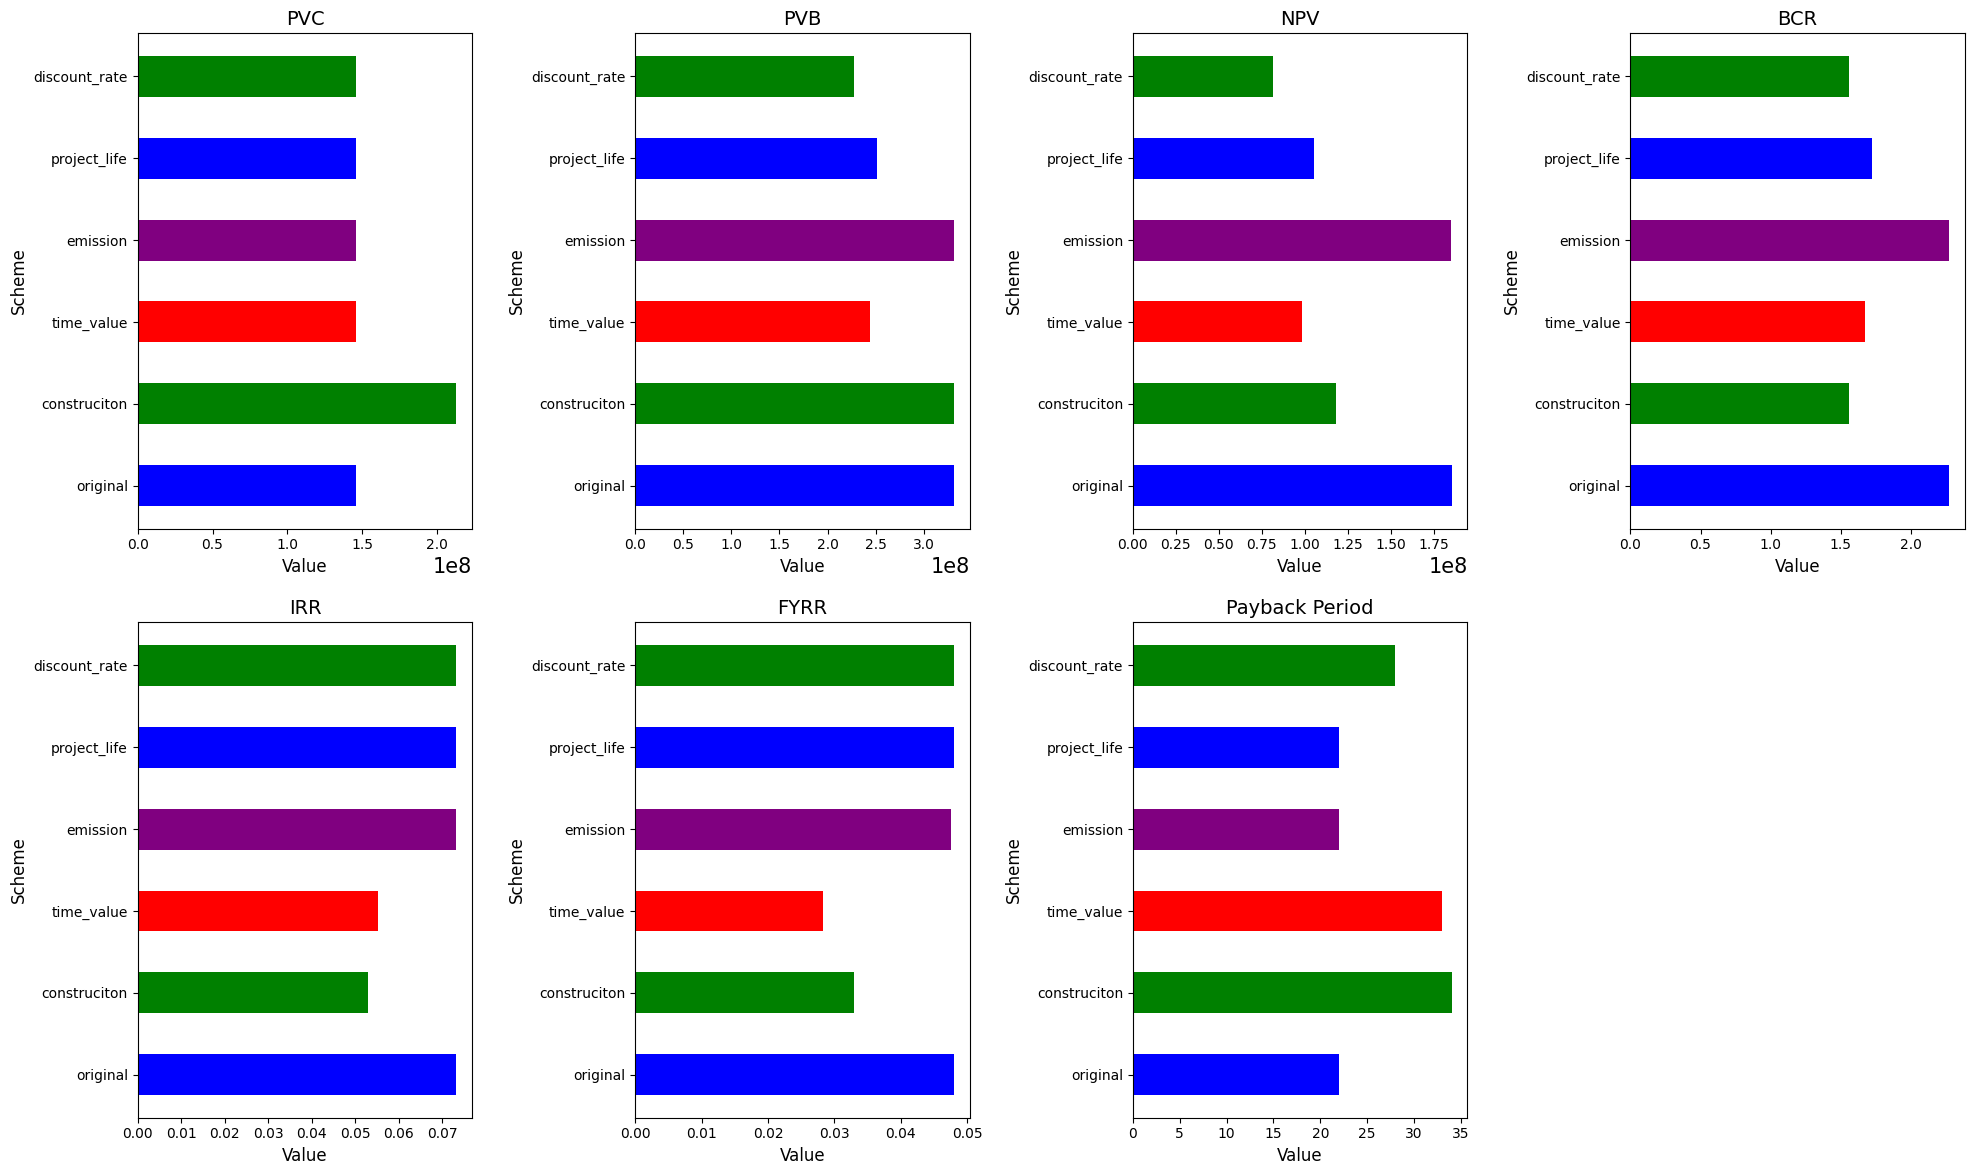

In [19]:
from sensitivity import sensitive_analysis

result_dict = sensitive_analysis()
plot_bar_chart(result_dict)